**Submitted By: Zainab Anwaar**

**CMS ID: 339636**


Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Loading and Splitting the Dataset


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 1s 0us/step


Normalizing and Splitting the Dataset

In [3]:
x_train = x_train.reshape((x_train.shape[0], -1)).astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Activation functions and Hidden Layer Nodes Number

In [4]:
activation_functions = ["sigmoid", "relu", "tanh"]
hidden_layer_sizes = [32, 64, 128, 256]

Function for training and Evaluating the Dataset


In [5]:
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=32):
  
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
    _, accuracy = model.evaluate(x_test, y_test)
    
    return accuracy, history

Training with Different Activation Functions and Number of Hidden Nodes

In [6]:
models = {}
histories = {}
best_accuracy=0.0;
for activation in activation_functions:
    for size in hidden_layer_sizes:

        model = keras.Sequential([
            layers.Dense(size, activation=activation, input_shape=(784,)),
            layers.Dense(size, activation=activation),
            layers.Dense(10, activation="softmax")
        ])
        accuracy, history = train_and_evaluate_model(model, x_train, y_train, x_test, y_test)
        if accuracy > best_accuracy:
          best_model = model
          best_accuracy = accuracy
   
        model_name = f"{activation}_{size}"
        models[model_name] = model
        histories[model_name] = history
        

        print(f"Accuracy ({activation}, {size}): {accuracy:.2%}")


Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.7667 - accuracy: 0.8321
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2549 - accuracy: 0.9287
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1913 - accuracy: 0.9448
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1581 - accuracy: 0.9540
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1363 - accuracy: 0.9599
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1204 - accuracy: 0.9645
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1084 - accuracy: 0.9680
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0987 - accuracy: 0.9710
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0906 - accuracy: 0.9734
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1148

Plot of all the results

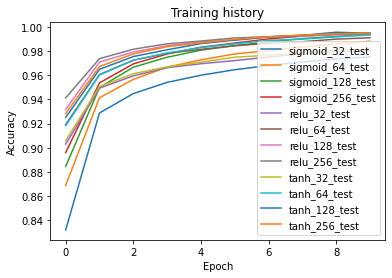

In [7]:
for name, history in histories.items():
    plt.plot(history.history["accuracy"], label=f"{name}_test")
   
plt.title("Training history")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Saving the Best Model

In [8]:
print(f"Best model accuracy: {best_accuracy:.2%}")
best_model.save("best_model.h5")

Best model accuracy: 98.24%
